In [71]:
# Route53, S3, ECS, Fargate, RDS, Lambda, API Gateway, SNS, EventBridge, ECR
from diagrams import Diagram, Cluster, Edge
from diagrams.aws.compute import Fargate, Lambda, ECS, ECR
from diagrams.aws.database import RDS, RDSMysqlInstance
from diagrams.aws.network import APIGateway, Route53, CloudFront, InternetGateway
from diagrams.aws.integration import Eventbridge, SNS
from diagrams.aws.storage import S3
from diagrams.onprem.container import Docker
from diagrams.onprem.ci import GithubActions
from diagrams.onprem.iac import Terraform

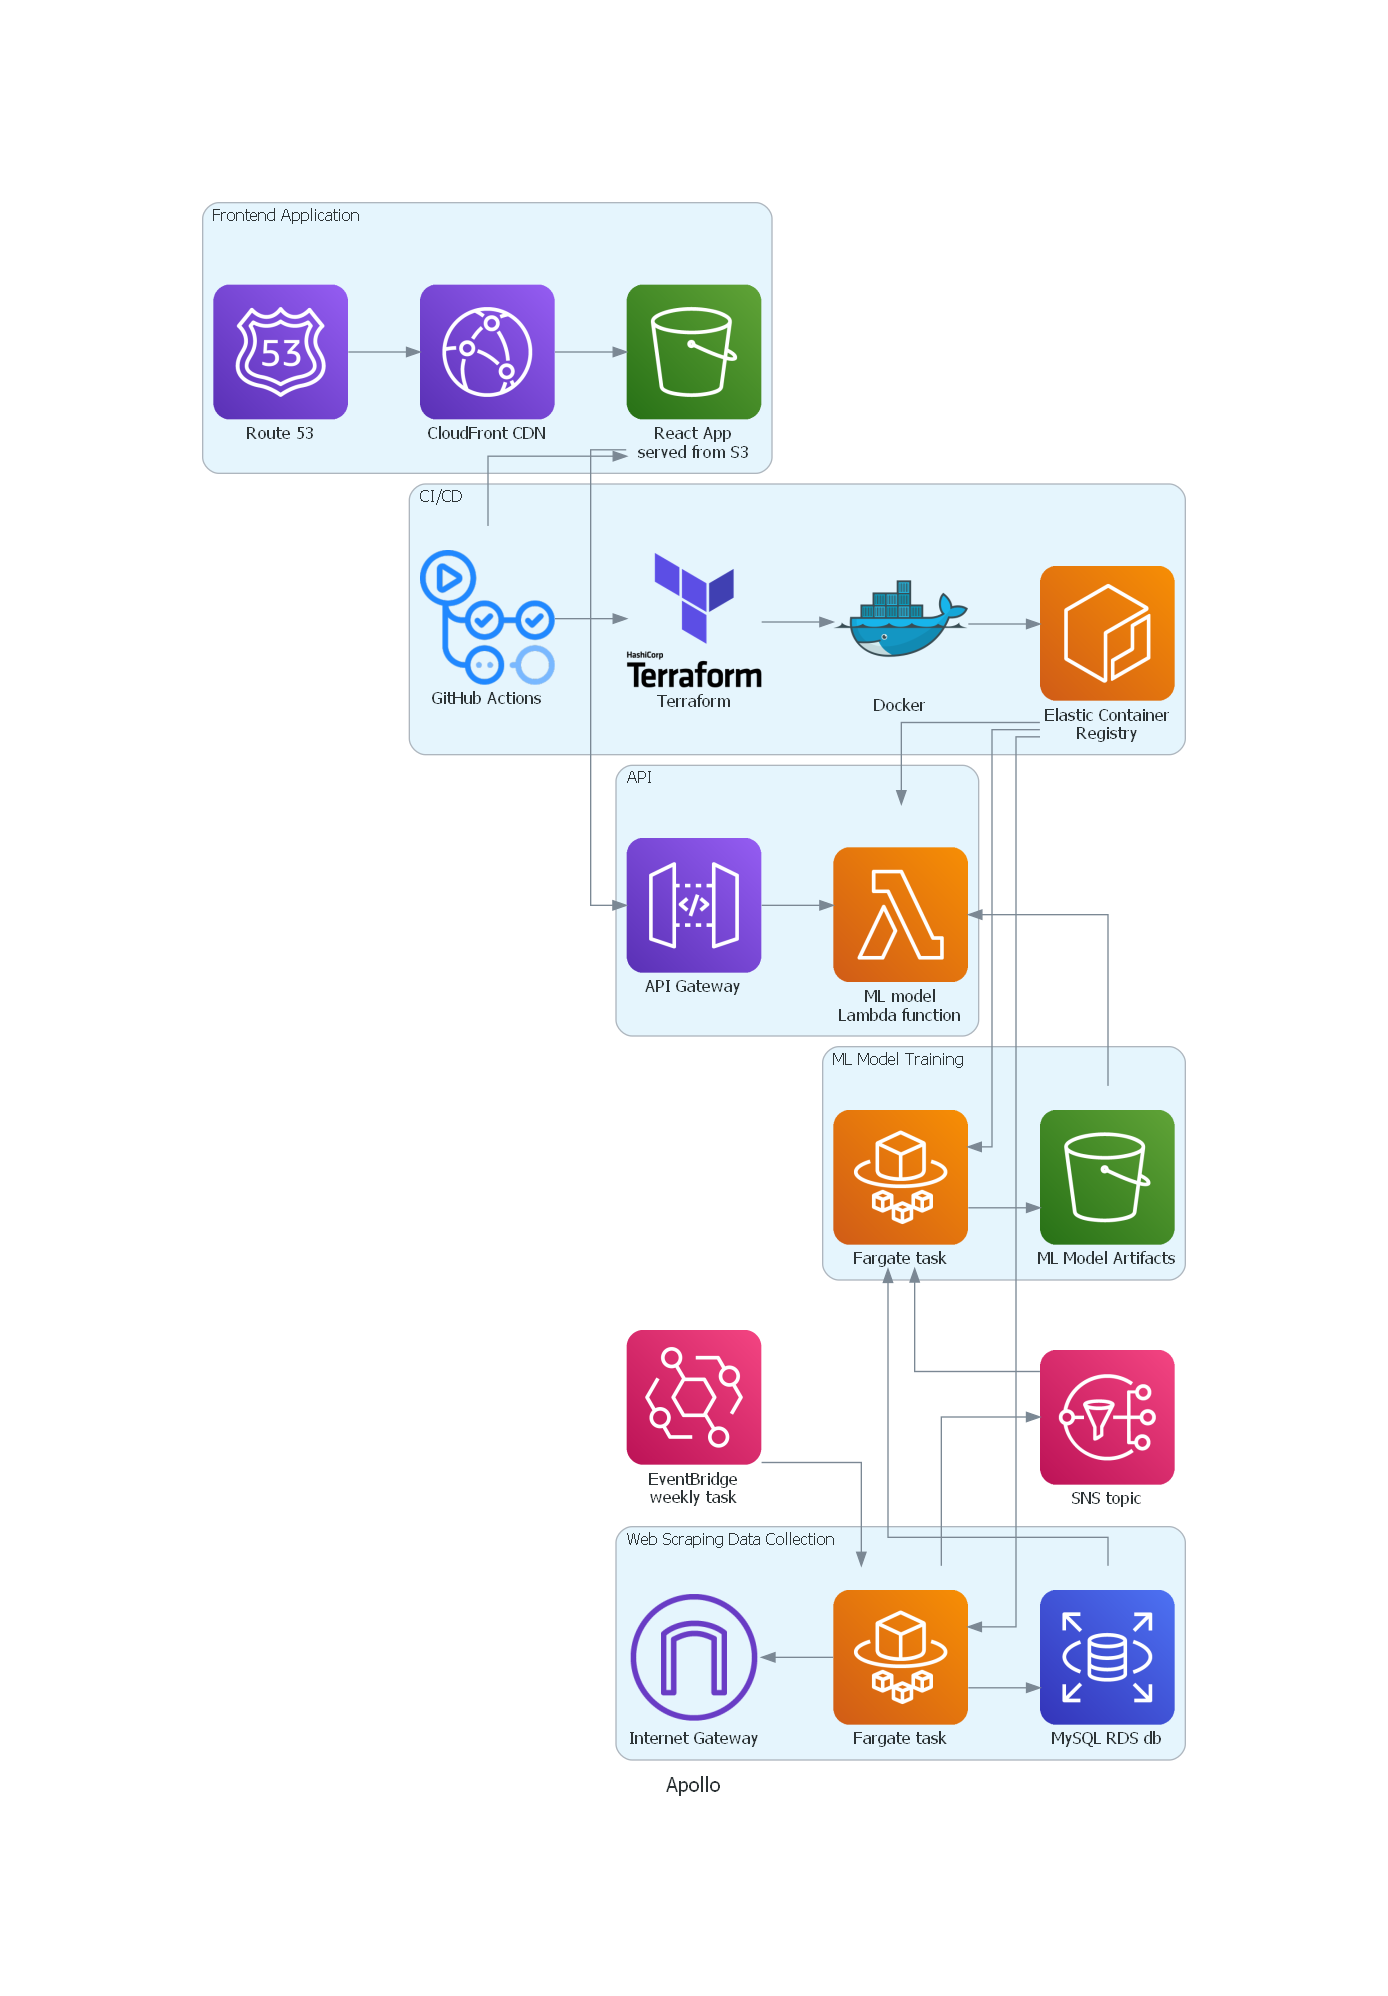

In [97]:
with Diagram("Apollo", show=False) as diag:
    # with Cluster(""):
    with Cluster("Frontend Application"):
        s3_app = S3("React App\nserved from S3")
        cf = CloudFront("CloudFront CDN")
        r53 = Route53("Route 53")
        r53 >> cf >> s3_app

    with Cluster("API"):
        apigw = APIGateway("API Gateway")
        lambda_ = Lambda("ML model\nLambda function")
        apigw >> lambda_

    with Cluster("Web Scraping Data Collection"):
        rds = RDS("MySQL RDS db")
        fg_scraper = Fargate("Fargate task")
        igw = InternetGateway("Internet Gateway")
        igw << fg_scraper >> rds

    with Cluster("ML Model Training"):
        s3_artifacts = S3("ML Model Artifacts")
        fg_modeller = Fargate("Fargate task")
        fg_modeller >> s3_artifacts

    with Cluster("CI/CD"):
        gha = GithubActions("GitHub Actions")
        tf = Terraform("Terraform")
        docker = Docker("Docker")
        ecr = ECR("Elastic Container\nRegistry")
        gha >> tf >> docker >> ecr

    eb = Eventbridge("EventBridge\nweekly task")
    sns = SNS("SNS topic")

    s3_app >> apigw
    fg_modeller << rds
    lambda_ << s3_artifacts
    eb >> fg_scraper >> sns >> fg_modeller
    lambda_ << ecr
    fg_scraper << ecr
    fg_modeller << ecr
    gha >> s3_app
    
diag